1. Build a neural net with a result with accuracy bigger than 90%
2. We will use TensorFlow ith keras to build our neural net

In [35]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from random import randint
import sklearn.metrics as met
import itertools
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve,recall_score

### Importing the Data 

In [23]:
CCData=pd.read_csv("CC.csv")

### Data Exploration 

0    284315
1       492
Name: Class, dtype: int64

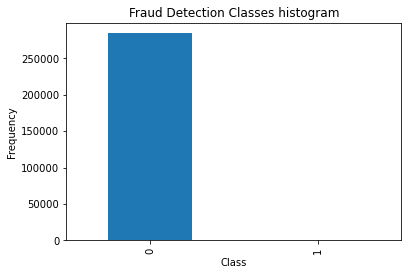

In [24]:
pd.value_counts(CCData['Class']).plot.bar()
plt.title('Fraud Detection Classes histogram')
plt.xlabel('Class')
plt.ylabel('Frequency')
CCData['Class'].value_counts()

### Scaling

In [25]:
std_scaler=StandardScaler()
CCData['SAmount']=std_scaler.fit_transform(CCData['Amount'].values.reshape(-1,1))
CCData['STime']=std_scaler.fit_transform(CCData['Time'].values.reshape(-1,1))
CCData.drop(['Time','Amount'],axis=1,inplace=True)
SCAmount= CCData['SAmount']
SCTime = CCData['STime']
CCData.drop(['SAmount', 'STime'], axis=1, inplace=True)
CCData.insert(1, 'SAmount', SCAmount)
CCData.insert(2, 'STime', SCTime)

#### Separation of input variables from target variable

In [26]:
CCFeature_names = CCData.iloc[:, 1:30].columns
targetClass = CCData.iloc[:1, 30:].columns

CCDataFeatures = CCData[CCFeature_names]
CCData_target = CCData[targetClass]

### Undersampling

In [27]:
# The function "len" counts the number of classes = 1 and saves it as an object "fraud_records"
fraud_records = len(CCData[CCData.Class == 1])

# Defines the index for fraud and non-fraud in the lines:
fraud_indices = CCData[CCData.Class == 1].index
not_fraud_indices = CCData[CCData.Class == 0].index

# Randomly collect equal samples of each type:
under_sample_indices = np.random.choice(not_fraud_indices, fraud_records, False)
df_undersampled = CCData.iloc[np.concatenate([fraud_indices, under_sample_indices]),:]
X_undersampled = df_undersampled.iloc[:,1:31]
Y_undersampled = df_undersampled.Class
X_undersampled_train, X_undersampled_test, Y_undersampled_train, Y_undersampled_test = train_test_split(X_undersampled, Y_undersampled, test_size = 0.30)

### Spliting the Training and Testing Datasets

In [28]:
X_train, X_test, y_train, y_test = train_test_split(CCDataFeatures, CCData_target,train_size = 0.70, test_size = 0.30, random_state = 0)

### Building the Artificial Neural Network Architecture

In [29]:
from sklearn.neural_network import MLPClassifier

In [30]:
MLPC = MLPClassifier(hidden_layer_sizes=(200,), max_iter=10000)
MLPC.fit(X_train, y_train)
y_pred = MLPC.predict(X_test)

/home/weldat/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [31]:
print("Evaluation Results of ANN Machine Learning Model on Skewed Data! ")
# Accuracy
print("Accuracy : ",met.accuracy_score(y_test, y_pred))
#Precision
print('Precision : ', met.precision_score(y_test, y_pred))
#F-1 Score 
print('F-1 Score : ',met.f1_score(y_test, y_pred))

#Recall= TP / [TP+FN] 
print('Recall/Sensitivity/ Score : ',met.recall_score(y_test,y_pred))


#Matthews Correlation Coefficient 
print('Matthews Correlation Coefficient : ',met.matthews_corrcoef(y_test, y_pred))

#Balanced classification Rate 
print('Balanced classification Rate: ',met.balanced_accuracy_score(y_test, y_pred))


Evaluation Results of ANN Machine Learning Model on Skewed Data! 
Accuracy :  0.9995201479348805
Precision :  0.9344262295081968
F-1 Score :  0.8475836431226766
Recall/Sensitivity/ Score :  0.7755102040816326
Matthews Correlation Coefficient :  0.8510402597590259
Balanced classification Rate:  0.8877082065240277


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

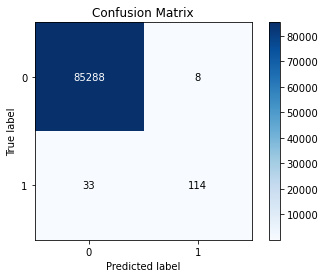

In [32]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_pred)

### ANN Model using Balanced Data

In [33]:
MLPC = MLPClassifier(hidden_layer_sizes=(200,), max_iter=10000)
MLPC.fit(X_undersampled_train,Y_undersampled_train)
yUnder_pred = MLPC.predict(X_undersampled_test)
accuracy_score(Y_undersampled_test, yUnder_pred)

0.9932432432432432

In [34]:
recall_score(Y_undersampled_test,yUnder_pred)
print("Evaluation Results of ANN Machine Learning Model on Balanced Data! ")
# Accuracy
print("Accuracy : ",met.accuracy_score(Y_undersampled_test, yUnder_pred))
#Precision
print('Precision : ', met.precision_score(Y_undersampled_test, yUnder_pred))
#F-1 Score 
print('F-1 Score : ',met.f1_score(Y_undersampled_test, yUnder_pred))

#Recall= TP / [TP+FN] 
print('Recall/Sensitivity/ Score : ',met.recall_score(Y_undersampled_test, yUnder_pred))

#Specificity -Similar to Recall but calculates for the Negative Score
   # Specificity= TN / [TN+FP] 

#Matthews Correlation Coefficient 
print('Matthews Correlation Coefficient : ',met.matthews_corrcoef(Y_undersampled_test, yUnder_pred))

#Balanced classification Rate 
print('Balanced classification Rate: ',met.balanced_accuracy_score(Y_undersampled_test, yUnder_pred))


NameError: name 'recall_score' is not defined